<a href="https://colab.research.google.com/github/jhteles/ufc_submissions/blob/main/ufc_kaggle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: open ufc.csv file

import pandas as pd

url='https://raw.githubusercontent.com/jhteles/ufc_submissions/refs/heads/main/ufc.csv'ufc_data = pd.read_csv(url, index_col=0)


In [ ]:
print(ufc_data)

                   Location            Fighter 1        Fighter 2  \
0        Austin, Texas, USA      Arman Tsarukyan   Beneil Dariush   
1        Austin, Texas, USA         Jalin Turner      Bobby Green   
2        Austin, Texas, USA  Deiveson Figueiredo         Rob Font   
3        Austin, Texas, USA           Sean Brady  Kelvin Gastelum   
4        Austin, Texas, USA        Joaquim Silva       Clay Guida   
...                     ...                  ...              ...   
7412  Denver, Colorado, USA         Orlando Wiet   Sean Daugherty   
7413  Denver, Colorado, USA        Frank Hamaker              NaN   
7414  Denver, Colorado, USA        Johnny Rhodes              NaN   
7415  Denver, Colorado, USA        Patrick Smith              NaN   
7416  Denver, Colorado, USA         Scott Morris              NaN   

      Fighter_1_KD  Fighter_2_KD  Fighter_1_STR  Fighter_2_STR  Fighter_1_TD  \
0              1.0           0.0            8.0            2.0           0.0   
1          

In [ ]:
# prompt: count 'KO/TKO' in 'Method'

ko_number = ufc_data['Method'].str.contains('KO/TKO').sum()
print(ko_number)

2437


In [ ]:
ufc_data['Method'].value_counts(normalize=True)

U-DEC                          0.351949
KO/TKO Punches                 0.123297
KO/TKO Punch                   0.109672
S-DEC                          0.094968
SUB Rear Naked Choke           0.075948
                                 ...   
Overturned Knee                0.000135
Overturned Rear Naked Choke    0.000135
KO/TKO Headbutts               0.000135
KO/TKO Headbutt                0.000135
Overturned D'Arce Choke        0.000135
Name: Method, Length: 70, dtype: float64

In [ ]:
# count 'submission' in 'Method'

ufc_data['Method'].value_counts()['U-DEC']


2609

In [ ]:
# prompt: in method column count all values containing the word SUB

sub_number = ufc_data['Method'].str.contains('SUB').sum()
print(sub_number)

1468


In [ ]:
ufc_data['Method'].str.contains('SUB')

0       False
1       False
2       False
3        True
4       False
        ...  
7412     True
7413      NaN
7414      NaN
7415      NaN
7416      NaN
Name: Method, Length: 7417, dtype: object

In [ ]:
# prompt: in column method, show each unique values containing word SUB

ufc_data[ufc_data['Method'].str.contains('SUB', case=False, na=False)]['Method'].unique()


array(['SUB Kimura', 'SUB Rear Naked Choke', 'SUB Neck Crank',
       'SUB Guillotine Choke', 'SUB Armbar', 'SUB Arm Triangle',
       'SUB Anaconda Choke', 'SUB Ezekiel Choke', 'SUB Triangle Choke',
       'SUB Twister', 'SUB Triangle Armbar', "SUB D'Arce Choke",
       'SUB Other - Lock', 'SUB Kneebar', 'SUB Inverted Triangle',
       'SUB Von Flue Choke', 'SUB Keylock', 'SUB Scarf Hold',
       'SUB Straight Armbar', 'SUB Heel Hook', 'SUB Ankle Lock',
       'SUB Forearm Choke', 'SUB Injury', 'SUB Peruvian Necktie',
       'SUB Schultz Front Headlock', 'SUB Bulldog Choke',
       'SUB Suloev Stretch', 'SUB Omoplata', 'SUB Calf Slicer',
       'SUB North-South Choke', 'SUB Pace/Pillory Choke', 'SUB Toe Hold',
       'SUB Shoulder Choke', 'SUB Other', 'SUB Other - Choke',
       'SUB Gi Choke'], dtype=object)

In [ ]:
submission_order = ufc_data[ufc_data['Method'].str.contains('SUB', case=False, na=False)]['Method'].value_counts()
print(submission_order)

SUB Rear Naked Choke          563
SUB Guillotine Choke          262
SUB Armbar                    177
SUB Arm Triangle              104
SUB Triangle Choke             92
SUB Kimura                     41
SUB D'Arce Choke               39
SUB Anaconda Choke             29
SUB Kneebar                    20
SUB Heel Hook                  18
SUB Neck Crank                 14
SUB Triangle Armbar            11
SUB Ankle Lock                  9
SUB Injury                      8
SUB Von Flue Choke              8
SUB Keylock                     8
SUB Bulldog Choke               7
SUB Scarf Hold                  7
SUB Other                       6
SUB Forearm Choke               5
SUB North-South Choke           5
SUB Inverted Triangle           4
SUB Ezekiel Choke               4
SUB Suloev Stretch              3
SUB Straight Armbar             3
SUB Other - Lock                3
SUB Twister                     3
SUB Schultz Front Headlock      2
SUB Peruvian Necktie            2
SUB Omoplata  

In [ ]:
ufc_data['Weight_Class'].unique()

array(['Lightweight', 'Bantamweight', 'Welterweight', 'Middleweight',
       "Women's Bantamweight", 'Light Heavyweight', "Women's Flyweight",
       "Women's Strawweight", 'Featherweight', 'Heavyweight', 'Flyweight',
       'Catch Weight', "Women's Featherweight", 'Super Heavyweight',
       'Open Weight', nan], dtype=object)

Insights:

*   KOs x Submissions (gráfico pie)
*   Submissões mais comuns (gráfico barras)



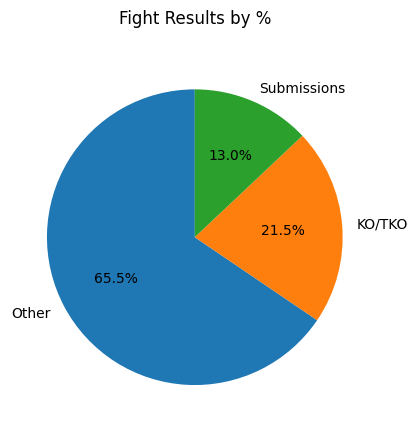

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([7417, ko_number, sub_number])
mylabels = ["Other", "KO/TKO", "Submissions"]

plt.pie(y, labels = mylabels, startangle = 90, autopct='%1.1f%%')
plt.title("Fight Results by %\n")
plt.show()

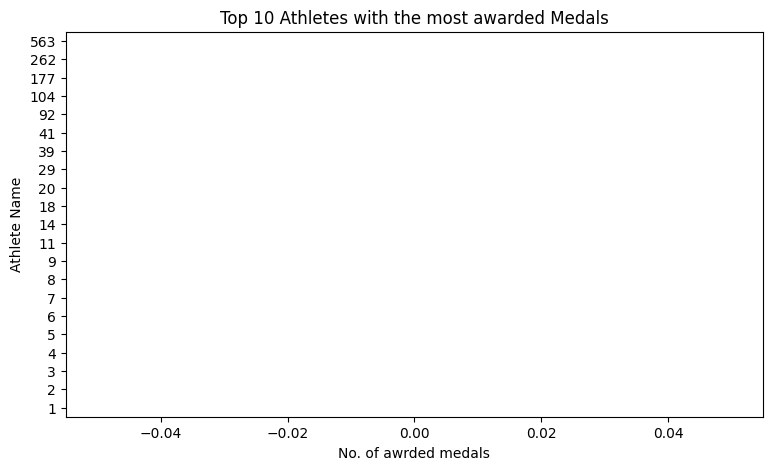

In [ ]:
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.countplot(data=ufc_data, y='Method', order=submission_order)
plt.title('Top 10 Athletes with the most awarded Medals')
plt.xlabel('No. of awrded medals')
plt.ylabel('Athlete Name');

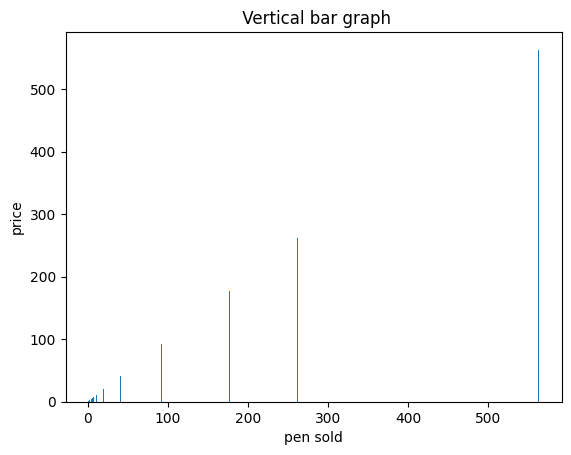

In [ ]:
plt.bar(submission_order[:],submission_order[:])

# setting x-label as pen sold
plt.xlabel("pen sold")

# setting y_label as price
plt.ylabel("price")
plt.title(" Vertical bar graph")
plt.show()

In [ ]:
type(submission_order)

pandas.core.series.Series

In [ ]:
ten_sub_order = submission_order[:10]
print(ten_sub_order)

SUB Rear Naked Choke    563
SUB Guillotine Choke    262
SUB Armbar              177
SUB Arm Triangle        104
SUB Triangle Choke       92
SUB Kimura               41
SUB D'Arce Choke         39
SUB Anaconda Choke       29
SUB Kneebar              20
SUB Heel Hook            18
Name: Method, dtype: int64


In [ ]:
asc_sub_order = ten_sub_order.sort_values(ascending = True)

In [ ]:
asc_sub_order = asc_sub_order.rename(index={'SUB Rear Naked Choke':'Mata-Leão','SUB Guillotine Choke':'Guilhotina'\
                                            ,'SUB Armbar':'Chave de braço','SUB Arm Triangle':'Triângulo de mão'\
                                            ,'SUB Triangle Choke':'Triângulo','SUB Kimura':'Kimura'\
                                            ,'SUB D\'Arce Choke':'D\'Arce','SUB Anaconda Choke':'Anaconda'\
                                            ,'SUB Kneebar':'Chave de joelho','SUB Heel Hook':'Chave de tornozelo'})
print(asc_sub_order)

Chave de tornozelo     18
Chave de joelho        20
Anaconda               29
D'Arce                 39
Kimura                 41
Triângulo              92
Triângulo de mão      104
Chave de braço        177
Guilhotina            262
Mata-Leão             563
Name: Method, dtype: int64


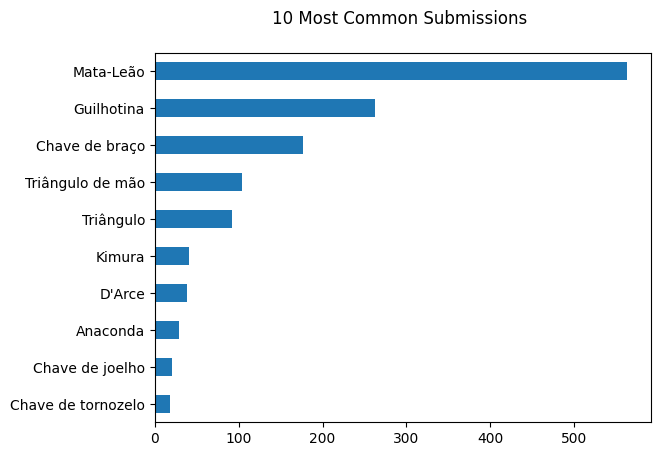

In [ ]:
plot = asc_sub_order.plot(kind='barh', title="10 Most Common Submissions \n")

In [ ]:
# prompt: save asc_sub_order as csv file

asc_sub_order.to_csv('ufc_submissions.csv')
